## gpt-3.5-turbo-instruct ELO Calibration

### Introduction

This notebook is the same as `GPT3p5TurboInstruct_ELO_calibration.ipynb`, but randomises the first six half moves of each game, to force GPT to play unconventional positions that it will not have seen during its training process. Refer to the original notebook for general details on the methodology.

### Results

`gpt-3.5-turbo-instruct`'s ELO is estimated to be 1574. In the original notebook that did not impose a randomised start sequence, GPT was estimated to have 1940 ELO. This difference is unsurprising — the unfamiliar board states are out of GPT's training distribution, and GPT does not adapt to them as well as Stockfish.

Of the 100 games, seven (#6, #29, #55, #56, #65, #66, and #87) were registered as losses for GPT due to illegal move selection. This compares to two lost games due to illegal moves in the original notebook that did not impose a randomised start sequence. Again, it is unsurprising that GPT finds it more difficult to track board state and make legal moves when presented with unfamiliar board positions.

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import sys

from pathlib import Path
import matplotlib.pyplot as plt

from llm_chess.players.llm.openai_instruct import GPT3p5TurboInstructPlayer
from llm_chess.utils.calibrate import calibrate_elo

logging.basicConfig(
    level=logging.WARNING,
    format="%(message)s",
    force=True
)

for module in [
    'llm_chess.players.llm.openai_instruct',
    'llm_chess.utils.calibrate',
]:
    logger = logging.getLogger(module)
    logger.setLevel(logging.INFO)
    logger.propagate = False

    handler = logging.StreamHandler(sys.stdout)
    handler.setFormatter(logging.Formatter("%(message)s"))
    logger.handlers = [handler]


In [2]:
INITIAL_LLM_ELO_ESTIMATE = 1500
NUM_GAMES = 100
PLAYER = GPT3p5TurboInstructPlayer()
START_K_FACTOR = 128
END_K_FACTOR = 8
N_RANDOMISED_STARTING_HALF_MOVES = 6

PROJECT_ROOT = Path().cwd().parents[0]
LOG_DIR = PROJECT_ROOT / "game_logs" / "gpt_3p5_turbo_instruct_calibration_with_random_start"
LOG_DIR.mkdir(parents=True, exist_ok=True)

game_scores_and_elos = calibrate_elo(
    PLAYER,
    initial_llm_elo_estimate=INITIAL_LLM_ELO_ESTIMATE,
    num_games=NUM_GAMES,
    start_k_factor=START_K_FACTOR,
    end_k_factor=END_K_FACTOR,
    write_dir=LOG_DIR,
    n_randomised_starting_half_moves=N_RANDOMISED_STARTING_HALF_MOVES,
)

--- Starting Player ELO Calibration ---
Initial Player ELO    : 1500
Initial Stockfish ELO : 1500
Number of Games       : 100
K-Factor              : 128 to 8
-----------------------------------

Game 1/100:
  Setting Stockfish ELO to: 1500
  Player played white. Game result: 1-0
  Player ELO updated from 1500 to 1564 (K-Factor: 128)

Game 2/100:
  Setting Stockfish ELO to: 1564
  Player played black. Game result: 1-0
  Player ELO updated from 1564 to 1501 (K-Factor: 126)

Game 3/100:
  Setting Stockfish ELO to: 1501
  Player played white. Game result: 1-0
  Player ELO updated from 1501 to 1563 (K-Factor: 125)

Game 4/100:
  Setting Stockfish ELO to: 1563
  Player played black. Game result: 0-1
  Player ELO updated from 1563 to 1625 (K-Factor: 124)

Game 5/100:
  Setting Stockfish ELO to: 1625
  Player played white. Game result: 0-1
  Player ELO updated from 1625 to 1563 (K-Factor: 123)

Game 6/100:
  Setting Stockfish ELO to: 1563
Error: Invalid move string: -O. Error: invalid san: '-

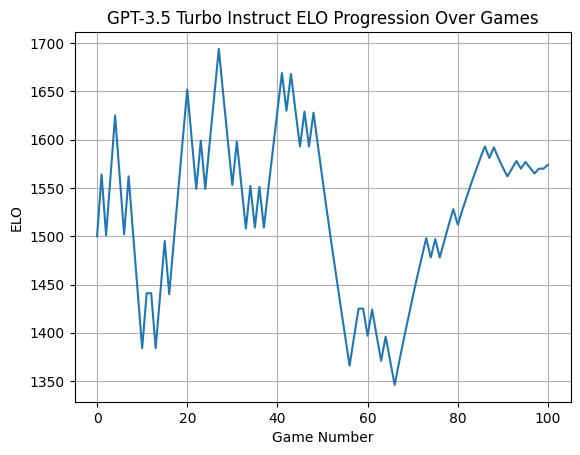

In [3]:
elos = [elo for _, elo in [(None, INITIAL_LLM_ELO_ESTIMATE)] + game_scores_and_elos]
plt.plot(elos)
plt.xlabel("Game Number")
plt.ylabel("ELO")
plt.title(f"{PLAYER.name} ELO Progression Over Games")
plt.grid(True)
plt.show()